<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 527 Homework 3

### Problem 0 (3 points)

## Part 1: Line Search 

### Problem 1.1 (Exam Style)

The given function $f$ is given by:<br>
$$f(x,y) = \frac{1}{2}(ax^{2} + by^{2})$$

$$a>0, b>0$$<br>
The gradient of the function is calculated by the following formula:
$$∇f(x,y) = ( \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2})$$<br>

$$\frac{\partial^2 f}{\partial x^2} = \frac{\partial^2(\frac{1}{2}(ax^{2} + by^{2}))}{\partial x^2} = ax$$ 

$$\frac{\partial^2 f}{\partial y^2} = \frac{\partial^2(\frac{1}{2}(ax^{2} + by^{2}))}{\partial y^2} = by$$ 

**Therefore**,

$$∇f(x,y) = ax + by$$

### Problem 1.2 (Exam Style)

For a starting point $f(x_0,y_0)$ and learning rate $\alpha$, we can deploy the following function to reach the local minimia:


In [ ]:
z = (a*x**2 + b*y**2)/2

### Problem 1.3 (Exam Style)

### Problem 1.4 (Exam Style)

### Problem 1.5 (Exam Style)

## Part 2: Automatic Differentiation

In [1]:
import autograd.numpy as np
from autograd import grad
from autograd import jacobian

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def banana(z):
    return np.array(100 * (z[1] - z[0] ** 2) ** 2 + (1 - z[0]) ** 2)

### Problem 2.1

In [4]:
banana_gradient = grad(banana)


In [5]:
banana_hessian = jacobian(grad(banana))

In [8]:
banana_hessian(z[:,0])[0,0]

4402.0

In [7]:
z0 = np.linspace(-2.,2.,101)
z1 = np.ones(z0.shape)

z = np.zeros((2,101))

for i in range(101):
  z[0,i] = z0[i]
  z[1,i] = z1[i]

In [9]:
banana_gradient_0 = []
banana_gradient_1 = []
for i in range(101):
  banana_gradient_0.append(banana_gradient(z[:,i])[0])
  banana_gradient_1.append(banana_gradient(z[:,i])[1])

In [10]:
banana_hessian_00 = []
banana_hessian_01 = []
banana_hessian_11 = []
for i in range(101):
  banana_hessian_00.append(banana_hessian(z[:,i])[0][0])
  banana_hessian_01.append(banana_hessian(z[:,i])[0][1])
  banana_hessian_11.append(banana_hessian(z[:,i])[1][1])

In [11]:
banana_hessian_00[0]

4402.0

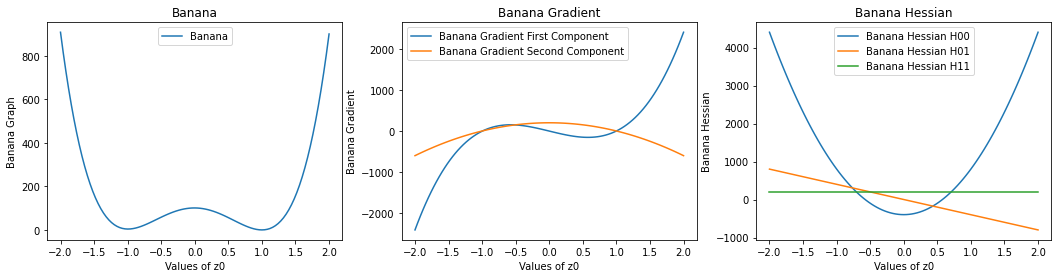

In [12]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.plot(z0,banana(z),label='Banana')
plt.title("Banana")
plt.xlabel('Values of z0')
plt.ylabel('Banana Graph')
plt.legend()

plt.subplot(1,3,2)
plt.plot(z0,banana_gradient_0,label='Banana Gradient First Component')
plt.plot(z0,banana_gradient_1,label='Banana Gradient Second Component')
plt.title("Banana Gradient")
plt.xlabel('Values of z0')
plt.ylabel('Banana Gradient')
plt.legend()

plt.subplot(1,3,3)
plt.plot(z0,banana_hessian_00,label='Banana Hessian H00')
plt.plot(z0,banana_hessian_01,label='Banana Hessian H01')
plt.plot(z0,banana_hessian_11,label='Banana Hessian H11')
plt.title("Banana Hessian")
plt.xlabel('Values of z0')
plt.ylabel('Banana Hessian')
plt.legend()

### Problem 2.2 (Exam style except for the function calls)

In [13]:
banana_gradient(np.array([[0],[0]]))

array([[-2],
       [ 0]])

In [14]:
banana_hessian(np.array([[0],[0]]))

array([[[[  2],
         [  0]]],


       [[[  0],
         [200]]]])

## Part 3: Gradient Descent

In [15]:
from scipy import optimize
from numpy import linalg as npl


def line_search(f, g, z0, f0, g0, state=None):
    outcome = optimize.line_search(f, g, z0, -g0, g0, f0)
    alpha, f1 = outcome[0], outcome[3]
    evaluations = outcome[1]
    if alpha is None:
        alpha, f1 = 0., f0
    z1 = z0 - g0 * alpha
    return z1, f1, evaluations, state

In [16]:
def gd(f, g, z0, step_function=line_search, state=None, max_evaluations=1000,
       min_step=1.e-8, min_gradient=1.e-6):
    evaluations, h = 0, []
    while True:
        f0, g0 = f(z0), g(z0)
        if not len(h):
            h.append((z0, f0))
        evaluations += 1
        if npl.norm(g0) < min_gradient:
            z1, f1 = z0, f0
            break
        z1, f1, n_eval, state = step_function(f, g, z0, f0, g0, state=state)
        evaluations += n_eval
        h.append((z1, f1))
        if npl.norm(z1 - z0) < min_step or evaluations > max_evaluations:
            break
        z0 = z1
    return z1, f1, evaluations, h

In [17]:
def momentum(f, g, z0, f0, g0, state=None):
    if state is None:
        state = {'alpha': 0.001, 'v0': 0., 'mu': 0.9}
    v1 = state['mu'] * state['v0'] - g0 * state['alpha']
    z1 = z0 + v1
    state['v0'] = v1
    return z1, f(z1), 1, state

### Problem 3.1

In [52]:
def fixed(f, g, z0, f0, g0, state=None):
  if state is None:
    state = {'alpha': 0.001, 'v0': 0., 'mu': 0.}
  v1 = state['mu'] * state['v0'] - g0 * state['alpha']
  z1 = z0 + v1
  state['v0'] = v1
  return z1, f(z1), 1, state

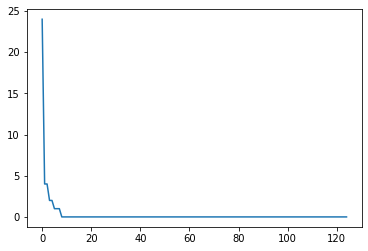

In [68]:
z1_1, f1_1, evaluations_1, h_1 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=line_search,state=None, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_1 = []
for i in range(len(h_1)):
  h_vals_1.append(int(h_1[i][1]))

plt.plot(np.arange(0,len(h_1)),h_vals_1)

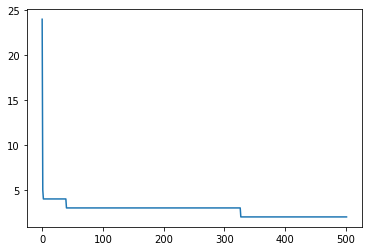

In [69]:
z1_2, f1_2, evaluations_2, h_2 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=fixed,state={'alpha': 0.001, 'v0': 0., 'mu': 0.}, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_2 = []
for i in range(len(h_2)):
  h_vals_2.append(int(h_2[i][1]))

plt.plot(np.arange(0,len(h_2)),h_vals_2)

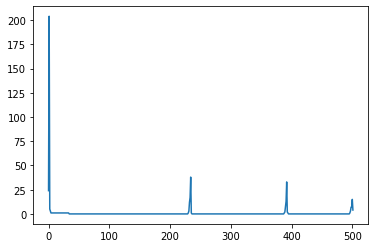

In [70]:
z1_3, f1_3, evaluations_3, h_3 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=fixed,state={'alpha': 0.005, 'v0': 0., 'mu': 0.}, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_3 = []
for i in range(len(h_3)):
  h_vals_3.append(int(h_3[i][1]))

plt.plot(np.arange(0,len(h_3)),h_vals_3)

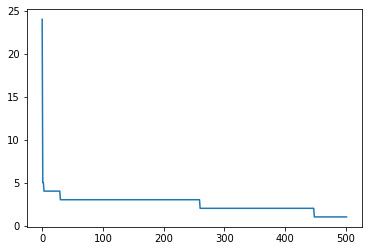

In [71]:
z1_4, f1_4, evaluations_4, h_4 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=momentum,state={'alpha': 0.001, 'v0': 0., 'mu': 0.2}, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_4 = []
for i in range(len(h_4)):
  h_vals_4.append(int(h_4[i][1]))

plt.plot(np.arange(0,len(h_4)),h_vals_4)

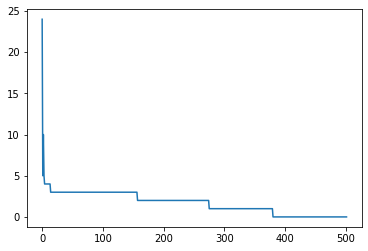

In [72]:
z1_5, f1_5, evaluations_5, h_5 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=momentum,state={'alpha': 0.001, 'v0': 0., 'mu': 0.5}, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_5 = []
for i in range(len(h_5)):
  h_vals_5.append(int(h_5[i][1]))

plt.plot(np.arange(0,len(h_5)),h_vals_5)

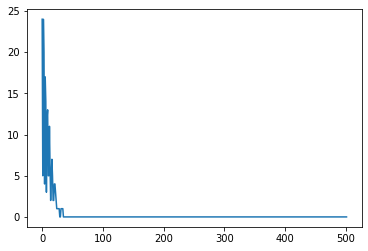

In [83]:
z1_6, f1_6, evaluations_6, h_6 = gd(banana,banana_gradient,np.array((-1.2, 1.)),step_function=momentum,state={'alpha': 0.001, 'v0': 0., 'mu': 0.92}, max_evaluations=1000,min_step=1.e-8, min_gradient=1.e-6)

h_vals_6 = []
for i in range(len(h_6)):
  h_vals_6.append(int(h_6[i][1]))

plt.plot(np.arange(0,len(h_6)),h_vals_6)

In [ ]:
z_0 = np.array((-1.2, 1.))
z_star = np.array([1., 1.])

In [ ]:
# steps = ((line_search, None), (fixed, {'alpha': 0.001}), (fixed, {'alpha': 0.005}),
#          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.2}),
#          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': 0.5}),
#          (momentum, {'alpha': 0.001, 'v0': 0., 'mu': ?}))

In [49]:
from numpy import array2string


def plot_contours(f, z_ast, rect):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    n = 101
    xs = np.linspace(rect[0], rect[1], n)
    ys = np.linspace(rect[2], rect[3], n)
    fs = np.array([[f(np.array([x, y])) for x in xs] for y in ys])
    plt.contour(xs, ys, fs, 20, colors='grey', linewidths=1)
    plt.plot(z_ast[0], z_ast[1], 'ro')
    plt.axis('scaled')


def fa(a, p=2):
    return array2string(np.array(a), precision=p, separator=', ')

In [50]:
def plot_history_path(h, f, z_ast, n_evals, state, rect=(-2., 2., -2., 2.)):
    assert len(z_ast) == 2, 'can only plot in two dimensions'
    plot_contours(f, z_ast, rect)
    plt.plot([p[0][0] for p in h], [p[0][1] for p in h])
    plt.plot(h[0][0][0], h[0][0][1], 'bo')
    z_last, f_last = h[-1][0], h[-1][1]
    ft = 'f({}) = {:.2g}; {} steps; {} evals'
    title = ft.format(fa(z_last), f_last, len(h), n_evals)
    if state is not None:
        s = state.copy()
        try:
            del s['v0']
        except KeyError:
            pass
        st = '; '.join(['{}={:.3g}'.format(name, value) for name, value in s.items()])
        title = '\n'.join((title, st))
    plt.title(title)

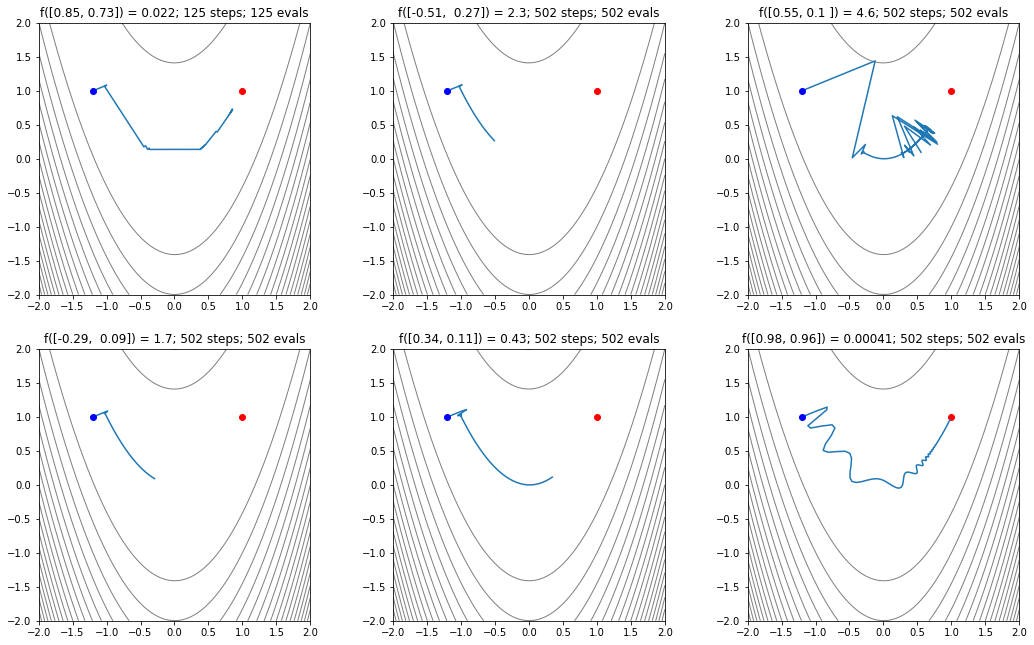

In [84]:
plt.figure(figsize=(18,11))
plt.subplot(2,3,1)
plot_history_path(h_1,banana,np.array([1., 1.]),len(h_1),None,rect=(-2., 2., -2., 2.))

plt.subplot(2,3,2)
plot_history_path(h_2,banana,np.array([1., 1.]),len(h_2),None,rect=(-2., 2., -2., 2.))

plt.subplot(2,3,3)
plot_history_path(h_3,banana,np.array([1., 1.]),len(h_3),None,rect=(-2., 2., -2., 2.))

plt.subplot(2,3,4)
plot_history_path(h_4,banana,np.array([1., 1.]),len(h_4),None,rect=(-2., 2., -2., 2.))

plt.subplot(2,3,5)
plot_history_path(h_5,banana,np.array([1., 1.]),len(h_5),None,rect=(-2., 2., -2., 2.))

plt.subplot(2,3,6)
plot_history_path(h_6,banana,np.array([1., 1.]),len(h_6),None,rect=(-2., 2., -2., 2.))

### Problem 3.2 (Exam Style)